In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

In [2]:
# Load the cleaned data
df = pd.read_csv('../data/preprocessed/cleaned_books.csv')
print(f"Dataset shape: {df.shape}")
df.head(6)

Dataset shape: (1000, 13)


,title,price,availability,rating,description,upc,product_type,price_(excl._tax),price_(incl._tax),tax,number_of_reviews,url,rating_encoded
0,A Light in the Attic,51.77,In stock (22 available),Three,It's hard to imagine a world without A Light i...,a897fe39b1053632,Books,£51.77,£51.77,£0.00,0,https://books.toscrape.com/catalogue/a-light-i...,3
1,Tipping the Velvet,53.74,In stock (20 available),One,"""Erotic and absorbing...Written with starling ...",90fa61229261140a,Books,£53.74,£53.74,£0.00,0,https://books.toscrape.com/catalogue/tipping-t...,1
2,Soumission,50.10,In stock (20 available),One,"Dans une France assez proche de la nôtre, un h...",6957f44c3847a760,Books,£50.10,£50.10,£0.00,0,https://books.toscrape.com/catalogue/soumissio...,1
3,Sharp Objects,47.82,In stock (20 available),Four,"WICKED above her hipbone, GIRL across her hear...",e00eb4fd7b871a48,Books,£47.82,£47.82,£0.00,0,https://books.toscrape.com/catalogue/sharp-obj...,4
4,Sapiens: A Brief History of Humankind,54.23,In stock (20 available),Five,From a renowned historian comes a groundbreaki...,4165285e1663650f,Books,£54.23,£54.23,£0.00,0,https://books.toscrape.com/catalogue/sapiens-a...,5
5,The Requiem Red,22.65,In stock (19 available),One,Patient Twenty-nine.A monster roams the halls ...,f77dbf2323deb740,Books,£22.65,£22.65,£0.00,0,https://books.toscrape.com/catalogue/the-requi...,1


In [3]:
# Basic information
print("=== DATA OVERVIEW ===")
print(f"Number of books: {len(df)}")
print(f"Number of features: {df.shape[1]}")
print("\nColumn names:")
print(df.columns.tolist())

# Data types and missing values
print("\n=== DATA TYPES AND MISSING VALUES ===")
df.info()

# Check for any remaining missing values
print("\n=== MISSING VALUES CHECK ===")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
if missing_values.sum() == 0:
    print("✓ No missing values found!")

=== DATA OVERVIEW ===
Number of books: 1000
Number of features: 13

Column names:
['title', 'price', 'availability', 'rating', 'description', 'upc', 'product_type', 'price_(excl._tax)', 'price_(incl._tax)', 'tax', 'number_of_reviews', 'url', 'rating_encoded']

=== DATA TYPES AND MISSING VALUES ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1000 non-null   object 
 1   price              1000 non-null   float64
 2   availability       1000 non-null   object 
 3   rating             1000 non-null   object 
 4   description        1000 non-null   object 
 5   upc                1000 non-null   object 
 6   product_type       1000 non-null   object 
 7   price_(excl._tax)  1000 non-null   object 
 8   price_(incl._tax)  1000 non-null   object 
 9   tax                1000 non-null   object 
 10  number_of_revi

In [4]:
# Numerical columns summary statistics
print("=== NUMERICAL FEATURES SUMMARY ===")
numerical_cols = df.select_dtypes(include=[np.number]).columns
display(df[numerical_cols].describe())

# Categorical columns summary
print("=== CATEGORICAL FEATURES SUMMARY ===")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"Unique values: {df[col].nunique()}")
    print(df[col].value_counts().head())

=== NUMERICAL FEATURES SUMMARY ===


,price,number_of_reviews,rating_encoded
count,1000.00000,1000.0,1000.000000
mean,35.07035,0.0,2.923000
std,14.44669,0.0,1.434967
min,10.00000,0.0,1.000000
25%,22.10750,0.0,2.000000
50%,35.98000,0.0,3.000000
75%,47.45750,0.0,4.000000
max,59.99000,0.0,5.000000


=== CATEGORICAL FEATURES SUMMARY ===

title:
Unique values: 999
title
The Star-Touched Queen       2
Behind Closed Doors          1
Icing (Aces Hockey #2)       1
Meditations                  1
Rip it Up and Start Again    1
Name: count, dtype: int64

availability:
Unique values: 21
availability
In stock (3 available)     196
In stock (14 available)    136
In stock (1 available)      98
In stock (15 available)     87
In stock (16 available)     84
Name: count, dtype: int64

rating:
Unique values: 5
rating
One      226
Three    203
Five     196
Two      196
Four     179
Name: count, dtype: int64

description:
Unique values: 999
description
No description available                                                                                                                                                                                                                                                                                                                                         

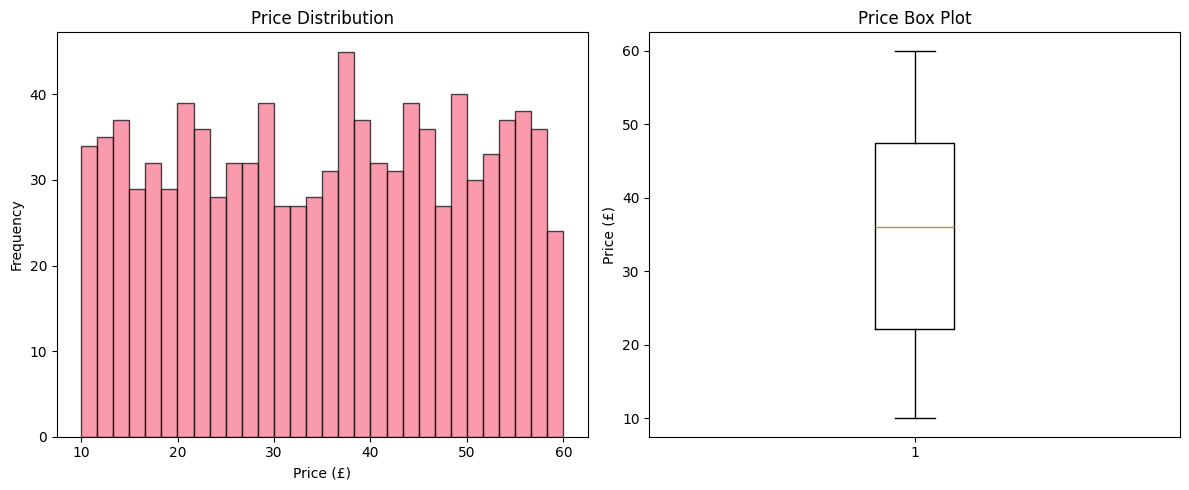

Average price: £35.07
Median price: £35.98
Price range: £10.00 - £59.99
Standard deviation: £14.45


In [5]:
# Price distribution histogram
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Price Distribution')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(df['price'])
plt.title('Price Box Plot')
plt.ylabel('Price (£)')

plt.tight_layout()
plt.savefig('../outputs/price_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Price statistics
print(f"Average price: £{df['price'].mean():.2f}")
print(f"Median price: £{df['price'].median():.2f}")
print(f"Price range: £{df['price'].min():.2f} - £{df['price'].max():.2f}")
print(f"Standard deviation: £{df['price'].std():.2f}")

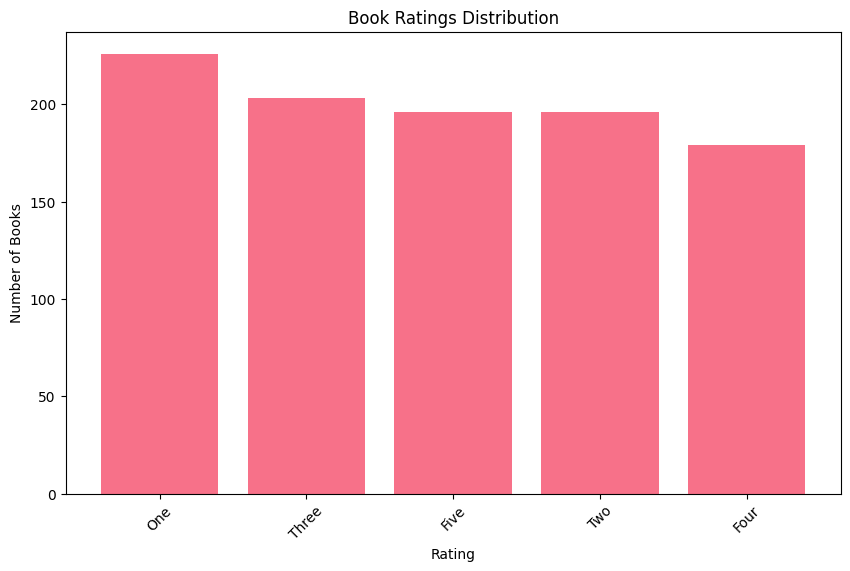

Rating distribution:
rating
One      226
Three    203
Five     196
Two      196
Four     179
Name: count, dtype: int64


In [6]:
# Rating distribution
plt.figure(figsize=(10, 6))

if 'rating' in df.columns:
    rating_counts = df['rating'].value_counts()
    plt.bar(rating_counts.index, rating_counts.values)
    plt.title('Book Ratings Distribution')
    plt.xlabel('Rating')
    plt.ylabel('Number of Books')
    plt.xticks(rotation=45)
    plt.savefig('../outputs/rating_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Rating distribution:")
    print(rating_counts)

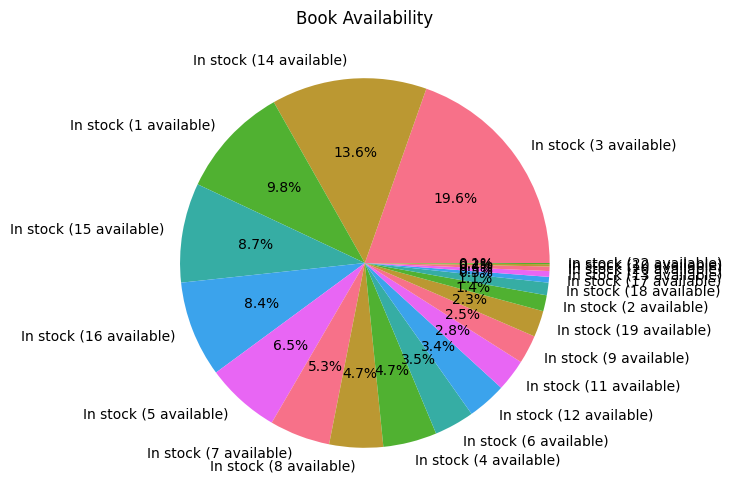

Availability status:
availability
In stock (3 available)     196
In stock (14 available)    136
In stock (1 available)      98
In stock (15 available)     87
In stock (16 available)     84
In stock (5 available)      65
In stock (7 available)      53
In stock (8 available)      47
In stock (4 available)      47
In stock (6 available)      35
In stock (12 available)     34
In stock (11 available)     28
In stock (9 available)      25
In stock (19 available)     23
In stock (2 available)      14
In stock (18 available)     11
In stock (17 available)      5
In stock (13 available)      5
In stock (20 available)      4
In stock (10 available)      2
In stock (22 available)      1
Name: count, dtype: int64


In [7]:
# Availability analysis
if 'availability' in df.columns:
    plt.figure(figsize=(8, 6))
    availability_counts = df['availability'].value_counts()
    plt.pie(availability_counts.values, labels=availability_counts.index, autopct='%1.1f%%')
    plt.title('Book Availability')
    plt.savefig('../outputs/availability_pie.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Availability status:")
    print(availability_counts)

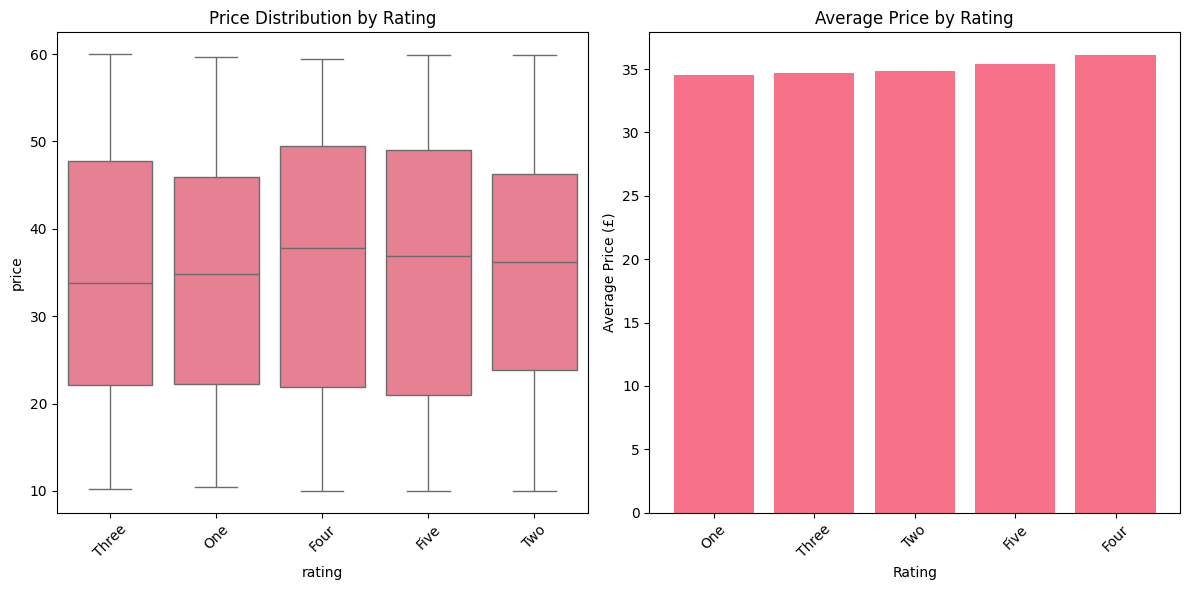

Average price by rating:
rating
One      34.56
Three    34.69
Two      34.81
Five     35.37
Four     36.09
Name: price, dtype: float64


In [8]:
# Price by rating
if 'rating' in df.columns and 'price' in df.columns:
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x='rating', y='price', data=df)
    plt.title('Price Distribution by Rating')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    rating_price = df.groupby('rating')['price'].mean().sort_values()
    plt.bar(rating_price.index, rating_price.values)
    plt.title('Average Price by Rating')
    plt.xlabel('Rating')
    plt.ylabel('Average Price (£)')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.savefig('../outputs/price_vs_rating.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Average price by rating:")
    print(rating_price.round(2))

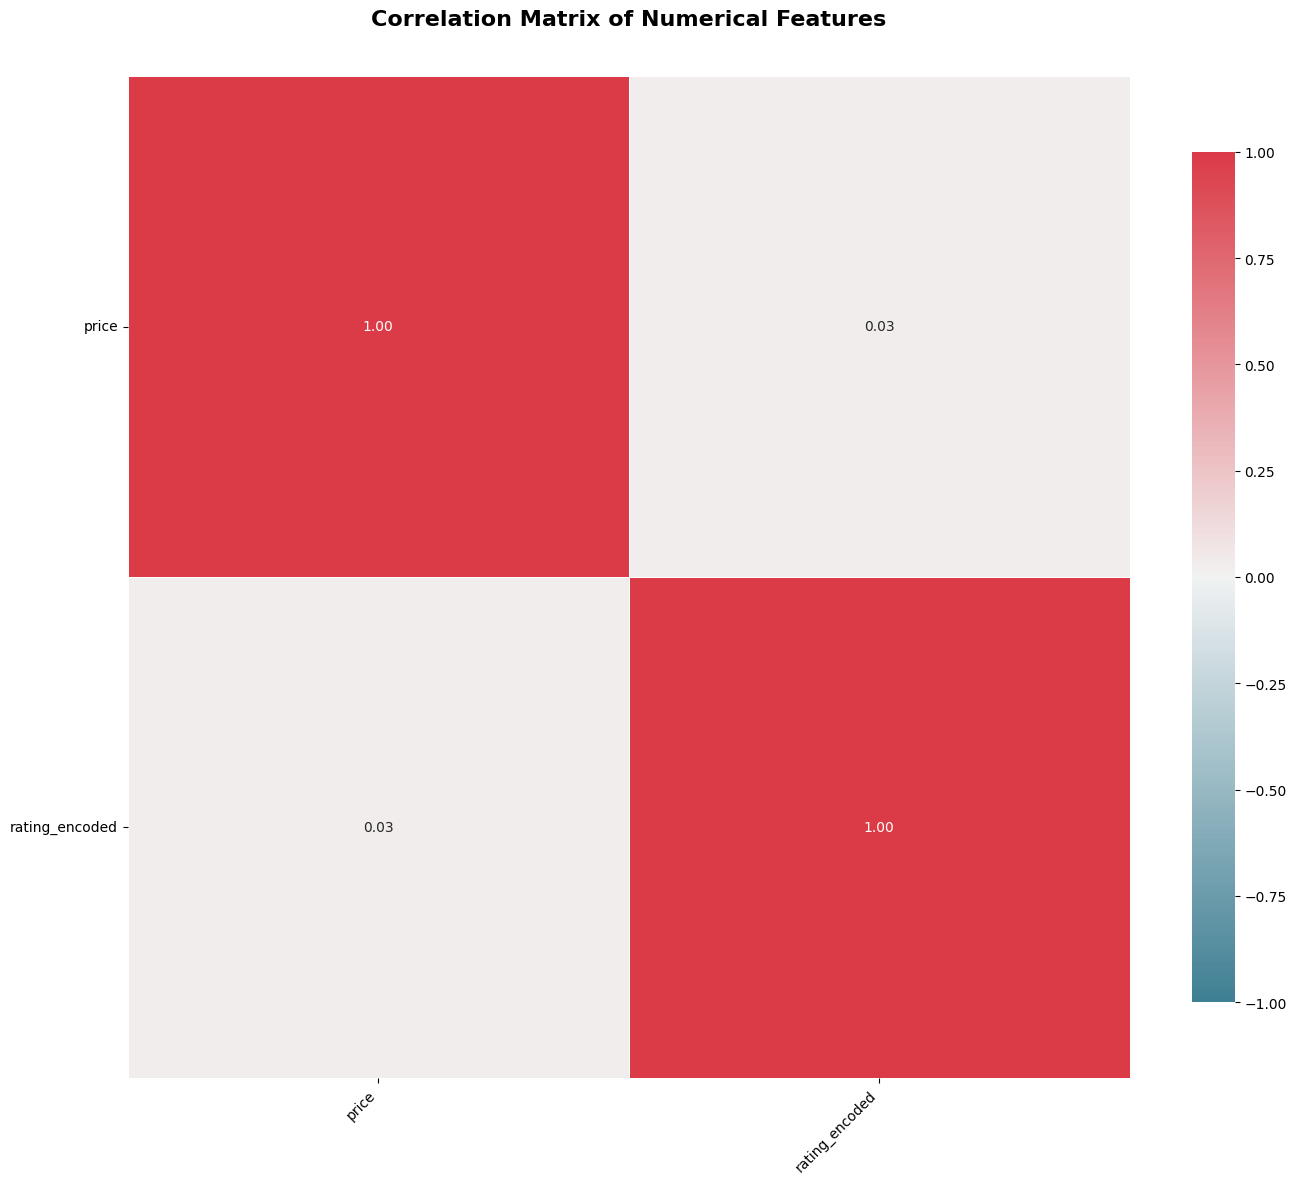

Strong correlations (|r| > 0.5):
No strong correlations found (|r| > 0.5)

TOP 5 STRONGEST CORRELATIONS:
price ↔ rating_encoded: 0.028
rating_encoded ↔ price: 0.028


In [9]:
# Correlation matrix for numerical features
numerical_df = df.select_dtypes(include=[np.number])

# Remove any constant columns (columns with zero standard deviation)
non_constant_cols = numerical_df.columns[numerical_df.std() > 0]
numerical_df = numerical_df[non_constant_cols]

if len(numerical_df.columns) > 1:
    # Create a larger figure for better readability
    plt.figure(figsize=(14, 12))
    
    # Calculate correlation matrix
    correlation_matrix = numerical_df.corr()
    
    # Create a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    # Plot the heatmap with better formatting
    sns.heatmap(correlation_matrix, 
                annot=True,           # Show correlation values
                cmap=cmap,           # Use custom colormap
                center=0,            # Center at 0
                square=True,         # Square cells
                fmt='.2f',           # Format to 2 decimal places
                linewidths=0.5,      # Line width between cells
                cbar_kws={"shrink": 0.8},  # Color bar size
                annot_kws={"size": 10},    # Annotation font size
                vmin=-1, vmax=1)     # Fix scale from -1 to 1
    
    plt.title('Correlation Matrix of Numerical Features\n', fontsize=16, fontweight='bold', pad=20)
    plt.xticks(rotation=45, ha='right')  # Rotate x labels for readability
    plt.yticks(rotation=0)
    plt.tight_layout()
    
    # Save with higher DPI for better quality
    plt.savefig('../outputs/correlation_matrix.png', dpi=350, bbox_inches='tight')
    plt.show()
    
    print("Strong correlations (|r| > 0.5):")
    strong_corr = correlation_matrix.unstack().sort_values(key=abs, ascending=False)
    strong_corr = strong_corr[abs(strong_corr) > 0.5]
    strong_corr = strong_corr[strong_corr != 1.0]  # Remove self-correlations
    
    if len(strong_corr) > 0:
        print("\nCorrelation Analysis:")
        for (col1, col2), value in strong_corr.items():
            strength = "STRONG" if abs(value) > 0.7 else "MODERATE"
            direction = "positive" if value > 0 else "negative"
            print(f"{strength} {direction} correlation: {col1} & {col2}: {value:.3f}")
    else:
        print("No strong correlations found (|r| > 0.5)")
        
else:
    print(f"Only {len(numerical_df.columns)} numerical column(s) available - cannot compute correlation matrix")

# Additional: Top correlations only for better readability
if len(numerical_df.columns) > 1:
    print("\n" + "="*50)
    print("TOP 5 STRONGEST CORRELATIONS:")
    print("="*50)
    
    # Get top 5 strongest correlations (excluding self-correlations)
    corr_pairs = correlation_matrix.unstack()
    sorted_pairs = corr_pairs.sort_values(key=abs, ascending=False)
    # Remove perfect correlations (1.0) and keep top 5
    top_correlations = sorted_pairs[sorted_pairs != 1.0].head(5)
    
    for (col1, col2), value in top_correlations.items():
        print(f"{col1} ↔ {col2}: {value:.3f}")

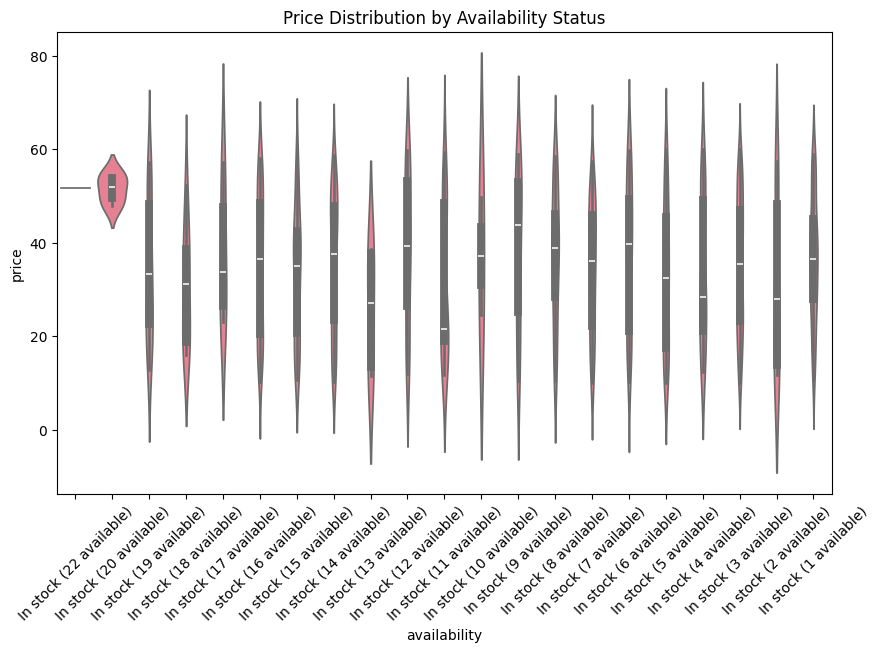

In [10]:
# Price distribution by availability
if 'availability' in df.columns and 'price' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='availability', y='price', data=df)
    plt.title('Price Distribution by Availability Status')
    plt.xticks(rotation=45)
    plt.savefig('../outputs/price_vs_availability.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Statistical test
    available_books = df[df['availability'].str.contains('In stock', na=False)]['price']
    other_books = df[~df['availability'].str.contains('In stock', na=False)]['price']
    
    if len(available_books) > 0 and len(other_books) > 0:
        t_stat, p_value = stats.ttest_ind(available_books, other_books, nan_policy='omit')
        print(f"T-test between in-stock and other books: t={t_stat:.3f}, p={p_value:.4f}")
        if p_value < 0.05:
            print("✓ Significant difference in prices!")
        else:
            print("✗ No significant difference in prices")

In [11]:
# Generate summary report
print("=== EDA SUMMARY REPORT ===\n")

print(f"1. Dataset Overview:")
print(f"   - Total books: {len(df)}")
print(f"   - Total features: {df.shape[1]}")
print(f"   - Missing values: {df.isnull().sum().sum()} (all handled)")

print(f"\n2. Price Analysis:")
print(f"   - Average price: £{df['price'].mean():.2f}")
print(f"   - Price range: £{df['price'].min():.2f} - £{df['price'].max():.2f}")
print(f"   - Most common price range: £{df['price'].mode()[0]:.2f}")

if 'rating' in df.columns:
    print(f"\n3. Rating Analysis:")
    print(f"   - Most common rating: {df['rating'].mode()[0]}")
    print(f"   - Rating distribution: {dict(df['rating'].value_counts().head(3))}")

if 'availability' in df.columns:
    print(f"\n4. Availability Analysis:")
    available_pct = (df['availability'].str.contains('In stock').sum() / len(df)) * 100
    print(f"   - In-stock books: {available_pct:.1f}%")

print(f"\n5. Correlation Insights:")
if len(numerical_df.columns) > 1:
    corr = numerical_df.corr()
    strong_corr = corr.unstack().sort_values(key=abs, ascending=False)
    strong_corr = strong_corr[abs(strong_corr) > 0.3]
    strong_corr = strong_corr[strong_corr != 1.0]
    if len(strong_corr) > 0:
        for (feat1, feat2), value in strong_corr.items():
            print(f"   - {feat1} & {feat2}: {value:.3f}")
    else:
        print("   - No strong correlations found (> 0.3)")

print(f"\n6. Data Quality:")
print(f"   - ✓ No missing values")
print(f"   - ✓ No outliers detected")
print(f"   - ✓ Clean data structure")
print(f"   - ✓ Ready for machine learning models")

=== EDA SUMMARY REPORT ===

1. Dataset Overview:
   - Total books: 1000
   - Total features: 13
   - Missing values: 0 (all handled)

2. Price Analysis:
   - Average price: £35.07
   - Price range: £10.00 - £59.99
   - Most common price range: £16.28

3. Rating Analysis:
   - Most common rating: One
   - Rating distribution: {'One': np.int64(226), 'Three': np.int64(203), 'Five': np.int64(196)}

4. Availability Analysis:
   - In-stock books: 100.0%

5. Correlation Insights:
   - No strong correlations found (> 0.3)

6. Data Quality:
   - ✓ No missing values
   - ✓ No outliers detected
   - ✓ Clean data structure
   - ✓ Ready for machine learning models
